<a href="https://colab.research.google.com/github/AttraqtiA/MNIST-Dataset-Playground/blob/main/Week4_CNN_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN (Convolutional neural network)**

In [29]:
import tensorflow as tf
import random

# DEPRECATED
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [30]:
import matplotlib.pyplot as plt

# MNIST(Modified National Institute of Standards and Technology) Database

# Load mnist
Mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = Mnist.load_data()

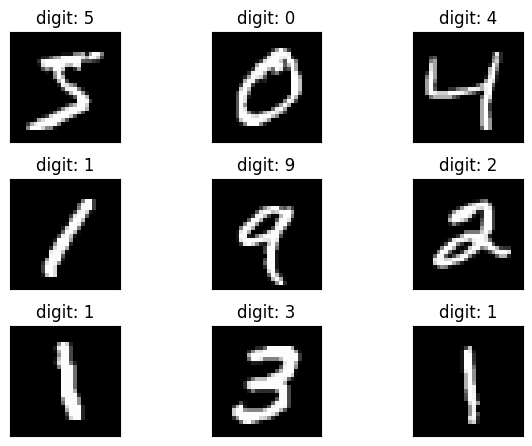

In [31]:
# Visualize 9 mnist images (28 x 28 size)
# Categorical, cuz its total of 10 numbers!

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28, 28), cmap="gray", interpolation="none")
  plt.title("digit: {}".format(t_train[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

In [32]:
# Change dataset integer -> real number type
x_train.astype('float32')
x_test.astype('float32')

# Change data pixel 0~255 values to 0~1 (normalization)
x_train, x_test = x_train/255, x_test/255

# Data type conversion (change dimension structure for CNN learning)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(t_train.shape)

(60000, 28, 28, 1)
(60000,)


In [33]:
# Answer label one-hot encoding
num_category = 10
t_train = tf.keras.utils.to_categorical(t_train, num_category)
t_test = tf.keras.utils.to_categorical(t_test, num_category)

# If the correct answer is 5
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [34]:
# Train model to read handwritten numbers

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_category, activation="softmax")
])

# 1. 64 filters, kernel size 3 (filter size), activation is relu, padding is 0 to have the same size as the original input (padding="same"), input data is 28x28x1 (1 channel).
# 2. Perform 2x2 MaxPooling. # 3. Increase the number of filters to 128, everything else remains the same.
# 4. Perform 2x2 MaxPooling. # 5. Dropout occurs with a 25% chance.
# 6. Convert to 1D using Flatten. (Because the correct answer label is 1D)
# 7. Create 64 nodes using Dense. (Activation relu) # 8. Dropout occurs with a 50% chance.
# 9. Since the answer label has 10 elements, use Dense to create 10 nodes. Since it is the final output, the activation function uses softmax.

In [35]:
# compile the generated model
# The loss function is crossentropy, the gradient optimization is adam, and the thing you want to find is accuracy!

model.compile(loss="categorical_crossentropy", optimizer="adam",
metrics=["accuracy"])

# Start model training
batch_size = 128
num_epoch = 10
History = model.fit(x_train, t_train, batch_size=batch_size, epochs=num_epoch,
validation_data=(x_test, t_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 169s 356ms/step - accuracy: 0.7899 - loss: 0.6446 - val_accuracy: 0.9816 - val_loss: 0.0530
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 345ms/step - accuracy: 0.9603 - loss: 0.1326 - val_accuracy: 0.9864 - val_loss: 0.0362
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 344ms/step - accuracy: 0.9717 - loss: 0.0951 - val_accuracy: 0.9884 - val_loss: 0.0358
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 341ms/step - accuracy: 0.9765 - loss: 0.0787 - val_accuracy: 0.9911 - val_loss: 0.0266
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 365ms/step - accuracy: 0.9801 - loss: 0.0645 - val_accuracy: 0.9908 - val_loss: 0.0285
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 168s 357ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9903 - val_loss: 0.0252
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 341ms/step - accuracy: 0.9839 - loss: 0.0513 - val_accuracy: 0.9915 - val_loss: 0.0240
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 345ms/step - accuracy: 0.9854 -

In [36]:
# Check test data
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss = ", score[0])
print("Test accuracy = ", score[1])

Test loss =  0.0204295814037323
Test accuracy =  0.9934999942779541


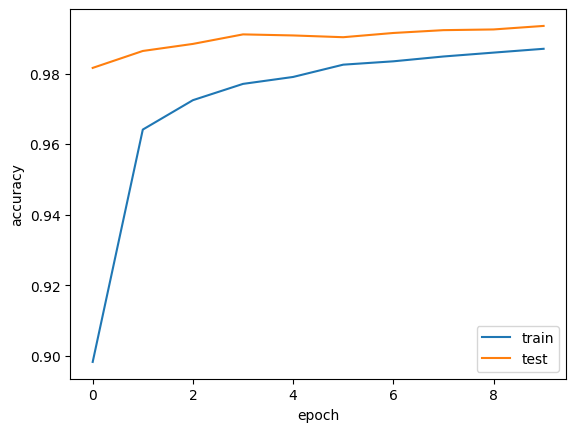

In [37]:
# Check accuracy
plt.plot(History.history['accuracy'], label="train")
plt.plot(History.history['val_accuracy'], label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

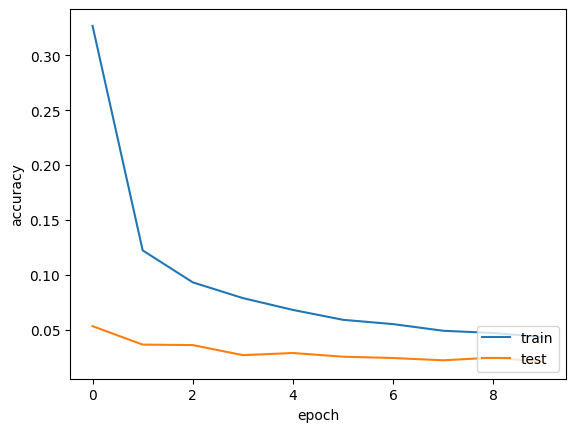

In [38]:
# Check loss value
plt.plot(History.history['loss'], label="train")
plt.plot(History.history['val_loss'], label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()